# Figure 4: Increased sea ice motion driven by ocean current

Plot of the seasonal climatology of sea ice motion, for years 2008-2011.

In [1]:
import sys
sys.path.insert(0, '/g/data/gh9/wgh581/Python_code/plot_code/metroms_code')
import os
from netCDF4 import *
from numpy import *
import copy
import cmocean.cm as cmo
from matplotlib.pyplot import *
import matplotlib.gridspec as gridspec
from fxn_rotate_vector_cice import rotate_vector_cice
from fxn_rotate_vector_roms import rotate_vector_roms
import xarray as xr

In [2]:
# Path
path = '/g/data/gh9/wgh581/ROMS_Output/metroms_files/'
CNTR = 'RAW/metroms_CONTROL/'
PERT = 'RAW/metroms_2SSFLUX/'
path_ending = 'cice/history/'
file_path = [path + CNTR + path_ending, path + PERT + path_ending]
roms_grid = path + CNTR + 'ocean_his_0042.nc'
roms_path = [path + 'POST_PROCESS/' + 'ocean_climatology_CONTROL_2008_2011.nc', path + 'POST_PROCESS/' + 'ocean_climatology_2SSFLUX_2008_2011.nc']
cice_CNTR = 'POST_PROCESS/cice_climatology_CONTROL_2008_2011.nc'
cice_PERT = 'POST_PROCESS/cice_climatology_2SSFLUX_2008_2011.nc'
cice_path = [path + cice_CNTR, path + cice_PERT]

In [3]:
fig_name = 'Figure4_2SSFLUX.png'
#fig_name  = 'Fig_seaice_ocean_motion_seasonal_ExtendedRegion_PRGn.png'
#fig_name  = 'Fig_seaice_motion_seasonal_ExtendedRegion.png'
season = ['DJF', 'MAM', 'JJA', 'SON']
panel_name = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']
panel_long = ['i)', 'j)', 'k)', 'l)']#, 'm)', 'n)', 'o)', 'p)']

In [4]:
# Region of interest
latmax = -50.
lonmin = 140#150.
lonmax = 300#300. 

In [5]:
# Read the CICE grid
dim_cice = xr.open_dataset(file_path[0] + 'iceh.2010-01-05.nc')
dim_cice = dim_cice.where((dim_cice.TLAT <= latmax) & (dim_cice.TLON >= lonmin) & (dim_cice.TLON <= lonmax), drop=True)

In [6]:
# Read the ROMS grid
dim_roms = xr.open_dataset(roms_grid)

lat_roms = dim_roms.lat_rho
lat_roms = lat_roms.where((dim_roms.lat_rho <= latmax) & (dim_roms.lon_rho >= lonmin) & (dim_roms.lon_rho <= lonmax), drop=True)

lon_roms = dim_roms.lon_rho
lon_roms = lon_roms.where((dim_roms.lat_rho <= latmax) & (dim_roms.lon_rho >= lonmin) & (dim_roms.lon_rho <= lonmax), drop=True)

h_roms = dim_roms.h
h_roms = h_roms.where((dim_roms.lat_rho <= latmax) & (dim_roms.lon_rho >= lonmin) & (dim_roms.lon_rho <= lonmax), drop=True)

zice_roms = dim_roms.zice
zice_roms = zice_roms.where((dim_roms.lat_rho <= latmax) & (dim_roms.lon_rho >= lonmin) & (dim_roms.lon_rho <= lonmax), drop=True)

mask_roms = dim_roms.mask_rho
mask_roms = mask_roms.where((dim_roms.lat_rho <= latmax) & (dim_roms.lon_rho >= lonmin) & (dim_roms.lon_rho <= lonmax), drop=True)

angle_roms = dim_roms.angle
angle_roms = angle_roms.where((dim_roms.lat_rho <= latmax) & (dim_roms.lon_rho >= lonmin) & (dim_roms.lon_rho <= lonmax), drop=True)

#### Sea ice 

Sea ice area (for masking and adding sea ice extent line to plot)

In [16]:
# # Load aice info for masking and adding sea ice extent line to plot
# aice_extmin = 0.15
# aice_cntr = xr.open_dataset(cice_path[0])
# aice_cntr = aice_cntr.where((aice_cntr.TLAT <= latmax) & (aice_cntr.TLON >= lonmin) & (aice_cntr.TLON <= lonmax), drop=True)
# aice_pert = xr.open_dataset(cice_path[1])
# aice_pert = aice_pert.where((aice_pert.TLAT <= latmax) & (aice_pert.TLON >= lonmin) & (aice_pert.TLON <= lonmax), drop=True)

In [7]:
aice_extmin = 0.15
aice_cntr = xr.open_dataset(path + 'POST_PROCESS/' + 'aice_hi_CONTROL_2002_2011_full.nc').aice.sel(time=slice('2008-12-01','2011-11-30')).groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))
aice_pert = xr.open_dataset(path + 'POST_PROCESS/' + 'aice_hi_2SSFLUX_2002_2011_full.nc').aice.sel(time=slice('2008-12-01','2011-11-30')).groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))

Load sea ice velocities

In [57]:
# cntr_1 = xr.open_dataset(cice_path[0])
# cntr_1 = cntr_1.where((cntr_1.TLAT <= latmax) & (cntr_1.TLON >= lonmin) & (cntr_1.TLON <= lonmax), drop=True)

In [8]:
cice_cntr = xr.open_dataset('/g/data/gh9/wgh581/ROMS_Output/metroms_files/POST_PROCESS/uvel_vvel_CONTROL_2002_2011_full.nc')
cice_cntr = cice_cntr.sel(time=slice('2008-12-01','2011-11-30')).groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))

In [33]:
# test_1 = xr.open_dataset(cice_path[1])
# test_1 = test_1.where((test_1.TLAT <= latmax) & (test_1.TLON >= lonmin) & (test_1.TLON <= lonmax), drop=True)

In [9]:
cice_pert = xr.open_dataset('/g/data/gh9/wgh581/ROMS_Output/metroms_files/POST_PROCESS/uvel_vvel_2SSFLUX_2002_2011_full.nc')
cice_pert = cice_pert.sel(time=slice('2008-12-01','2011-11-30')).groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))

Rotate velocities

In [10]:
uvel_cice_cntr, vvel_cice_cntr = rotate_vector_cice(cice_cntr.uvel, cice_cntr.vvel, dim_cice.ANGLE)
uvel_cice_pert, vvel_cice_pert = rotate_vector_cice(cice_pert.uvel, cice_pert.vvel, dim_cice.ANGLE)

In [93]:
# uvel_cntr_1, vvel_cntr_1 = rotate_vector_cice(cntr_1.uvel, cntr_1.vvel, cntr_1.ANGLE)

In [103]:
# # Rotate to lat/lon grid
# #angle_cice_area = angle_cice.where((angle_cice.TLAT <= latmax) & (angle_cice.TLON >= lonmin) & (angle_cice.TLON <= lonmax), drop=True)
# uvel_1, vvel_1 = rotate_vector_cice(test_1.uvel, test_1.vvel, test_1.ANGLE)
# uvel_2, vvel_2 = rotate_vector_cice(test_2.uvel, test_2.vvel, test_1.ANGLE)
# uvel_3, vvel_3 = rotate_vector_cice(test_3.uvel, test_3.vvel, test_1.ANGLE)

Mask for sea ice area

In [11]:
uvel_cice_cntr = uvel_cice_cntr.where(aice_cntr > aice_extmin, np.nan)
uvel_cice_pert = uvel_cice_pert.where(aice_pert > aice_extmin, np.nan)

Speed

In [12]:
speed_cice_cntr = np.sqrt(uvel_cice_cntr**2 + vvel_cice_cntr**2)
speed_cice_pert = np.sqrt(uvel_cice_pert**2 + vvel_cice_pert**2)

In [95]:
# speed_cntr_1 = np.sqrt(uvel_cntr_1**2 + vvel_cntr_1**2)
# speed_cntr_2 = np.sqrt(uvel_cntr_2**2 + vvel_cntr_2**2)

In [104]:
# speed_1 = np.sqrt(uvel_1**2 + vvel_1**2)
# speed_2 = np.sqrt(uvel_2**2 + vvel_2**2)
# speed_3 = np.sqrt(uvel_3**2 + vvel_3**2)

In [9]:
# # Load sea ice motion (uvel, vvel)
# for ii in range(len(file_path)):
#     id = Dataset(cice_path[ii], 'r')
#     uvel_tmp = id.variables['uvel'][:,:-15,:-1]
#     vvel_tmp = id.variables['vvel'][:,:-15,:-1]
#     # Rotate to lat/lon grid
#     uvel_tmp, vvel_tmp = rotate_vector_cice(uvel_tmp, vvel_tmp, angle_cice)
#     # Masking
#     uvel_tmp[aice[ii] < aice_extmin] = np.nan
#     vvel_tmp[aice[ii] < aice_extmin] = np.nan
#     # Magnitude of sea ice motion
#     speed_tmp = np.sqrt(uvel_tmp**2 + vvel_tmp**2)
#     if ii == 0:
#         uvel = uvel_tmp
#         vvel = vvel_tmp
#         seaice_speed = speed_tmp
#     elif ii == 1:
#         uvel = [uvel, uvel_tmp]
#         vvel = [vvel, vvel_tmp]
#         seaice_speed = [seaice_speed, speed_tmp]

In [15]:
# Load ocean surface velocity
for ii in range(len(roms_path)):
    id = Dataset(roms_path[ii], 'r')
    u_tmp = id.variables['u'][:,-1,:-15,:-1]#[:,-1,:-15,:-1]
    v_tmp = id.variables['v'][:,-1,:-15,:-1]#[:,-1,:-15,:-1]
    id.close()
    # Rotate velocity to lat/lon space and move to tracer grid
    speed_tmp = np.zeros((4, np.size(angle_roms,0), np.size(angle_roms,1)))
    u_lonlat_tmp = np.zeros((4, np.size(angle_roms,0), np.size(angle_roms,1)))
    v_lonlat_tmp = np.zeros((4, np.size(angle_roms,0), np.size(angle_roms,1)))
    for tt in range(4):
        # Rotate velocity vectors
        u_rot_tmp, v_rot_tmp = rotate_vector_roms(u_tmp[tt,:,:], v_tmp[tt,:,:], angle_roms)
        # Calculate magnitude of ocean velocity
        speed_tmp[tt,:,:] = np.sqrt(u_rot_tmp**2 + v_rot_tmp**2)
        # Write u_lonlat, v_lonlat
        u_rot_tmp[zice!=0] = np.nan
        v_rot_tmp[zice!=0] = np.nan
        u_lonlat_tmp[tt,:,:] = u_rot_tmp
        v_lonlat_tmp[tt,:,:] = v_rot_tmp
        # Masking
        speed_tmp[:,1:-1,1:-1][aice[0] < aice_extmin] = np.nan
        v_lonlat_tmp[:,1:-1,1:-1][aice[0] < aice_extmin] = np.nan
        u_lonlat_tmp[:,1:-1,1:-1][aice[0] < aice_extmin] = np.nan
        # Set values over 0.3 m/s to nan 
        # (Values around ice shelf front are very large, this cut shouldn't remove 
        #  values we are actually interested in.)
        v_lonlat_tmp[u_lonlat_tmp > 0.3] = np.nan
        u_lonlat_tmp[u_lonlat_tmp > 0.3] = np.nan
        u_lonlat_tmp[v_lonlat_tmp > 0.3] = np.nan
        v_lonlat_tmp[v_lonlat_tmp > 0.3] = np.nan

    if ii == 0:
        speed = speed_tmp
        #u_lonlat = u_lonlat_tmp
        #v_lonlat = v_lonlat_tmp
    elif ii == 1:
        speed = [speed, speed_tmp]
        #u_lonlat = [u_lonlat, u_lonlat_tmp]
        #v_lonlat = [v_lonlat, v_lonlat_tmp]

ValueError: operands could not be broadcast together with shapes (415,1441) (329,638) 

In [16]:
# Masking
h = ma.masked_where(mask_roms==0, h_roms)
zice = ma.masked_where(mask_roms==0, zice_roms)
zice = ma.masked_where(zice==0, zice_roms)
lat_r = ma.masked_where(mask_roms==1, lat_roms)

Infos for plotting

In [17]:
# Spherical coordinates
deg2rad_val = pi/180.0
# CICE
x_cice = -(dim_cice.TLAT+90)*cos(dim_cice.TLON*deg2rad_val+pi/2)
y_cice = (dim_cice.TLAT+90)*sin(dim_cice.TLON*deg2rad_val+pi/2)
# ROMS
x_roms = -(lat_roms+90)*cos(lon_roms*deg2rad_val+pi/2)
y_roms = (lat_roms+90)*sin(lon_roms*deg2rad_val+pi/2)

In [18]:
# Center of missing circle (ROMS)    
lat_c   = -83
lon_c   = 50
# Radius of missing circle (play around with this until it works)
radius  = 10.1
# Find center in spherical coordinates
x_c_metroms = -(lat_c+90)*cos(lon_c*deg2rad_val+pi/2)
y_c_metroms = (lat_c+90)*sin(lon_c*deg2rad_val+pi/2)
# Build a regular x-y grid and select the missing circle
lat_max = -63+90
x_reg, y_reg = meshgrid(linspace(-lat_max, lat_max, num=1000), linspace(-lat_max, lat_max, num=1000))
land_circle = zeros(shape(x_reg))
land_circle_metroms = ma.masked_where(sqrt((x_reg-x_c_metroms)**2 + (y_reg-y_c_metroms)**2) > radius, land_circle)

In [19]:
ft_size = 14
my_dpi = 150

In [20]:
# Colormap
from palettable.scientific.diverging import Vik_19_r 
from palettable.scientific.sequential import LaPaz_3_r
from palettable.colorbrewer.diverging import PRGn_5_r
#cmo_curl = copy.copy(cmo.curl)
#cmo_curl.set_under('white')
#cmo_curl.set_over('white')

In [21]:
import matplotlib as mpl
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
            normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
            normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
            normalized_mid = 0.5
            x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
            return np.ma.masked_array(np.interp(value, x, y))
norm = MidpointNormalize(vmin=0, vmax=0.2, midpoint=0.05)

In [22]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
Test = cm.get_cmap(Vik_19_r.mpl_colormap, 512)
newcmp = ListedColormap(Test(np.linspace(0.25, 0.75, 256)))

In [23]:
Vik_19_r_blues = ListedColormap(Test(np.linspace(0.5, 1, 256)))

In [24]:
# Region range
xlim_min = -25
xlim_max = 15
ylim_min = -30
ylim_max = 7

In [27]:
import cartopy.crs as ccrs

In [ ]:
projection = ccrs.SouthPolarStereo()
figure(figsize=(10, 9))
ax = axes(projection=projection)

speed_cice_cntr[tt,:,:].plot(transform=ccrs.PlateCarree())
# sc = pcolormesh(x=speed_cice_cntr.TLON, y=speed_cice_cntr.TLAT, speed_cice_cntr[tt,:,:], transform=ccrs.PlateCarree(), cmap=Vik_19_r_blues, norm=norm)
# xlim(xlim_min, xlim_max)
# ylim(ylim_min, ylim_max)
# ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


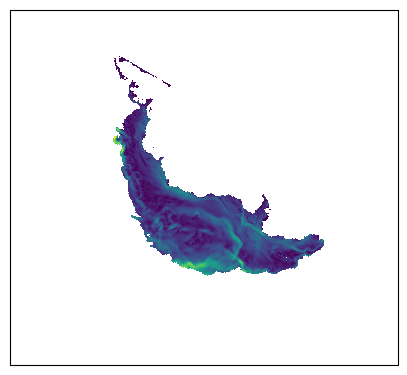

In [52]:
# speed_cice_cntr[tt,:,:].plot()
projection = ccrs.SouthPolarStereo()
figure(figsize=(5, 5))
ax = axes(projection=projection)

pcolormesh(speed_cice_cntr.TLON, speed_cice_cntr.TLAT, speed_cice_cntr[tt,:,:], transform=ccrs.PlateCarree())
ax.set_extent([140, 300, -90, -50], ccrs.PlateCarree())

/jobfs/83320972.gadi-pbs/ipykernel_2167459/1849287007.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcolormesh(speed_cice_cntr.TLON, speed_cice_cntr.TLAT, speed_cice_cntr[tt,:,:])


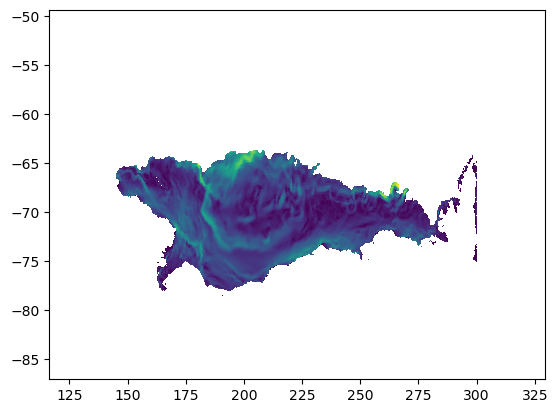

In [49]:
pcolormesh(speed_cice_cntr.TLON, speed_cice_cntr.TLAT, speed_cice_cntr[tt,:,:])

/jobfs/83297420.gadi-pbs/ipykernel_2328244/2365263470.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  sc = pcolormesh(x_cice, y_cice, speed_cice_cntr[tt,:,:], cmap=Vik_19_r_blues, norm=norm)
/jobfs/83297420.gadi-pbs/ipykernel_2328244/2365263470.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  sc = pcolormesh(x_cice, y_cice, speed_cice_cntr[tt,:,:], cmap=Vik_19_r_blues, norm=norm)
/jobfs/83297420.gadi-pbs/ipykernel_2328244/2365263470.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. T

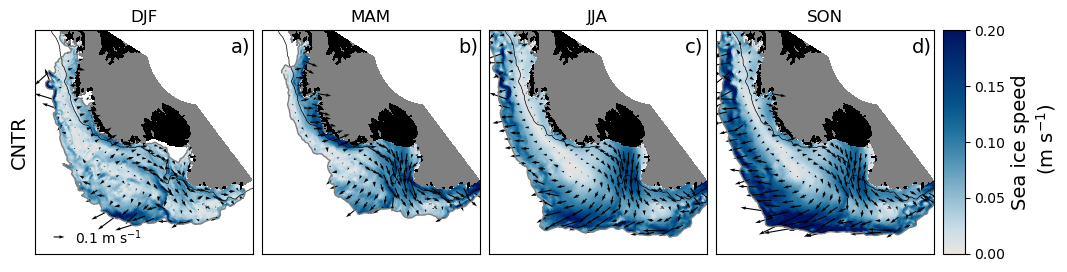

In [36]:
# Sea ice motion
fig = figure(figsize=(12,9))

gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.05)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[0], wspace=0.05)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[1], wspace=0.05)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[2], wspace=0.05)

for tt in range(len(season)):

    # CNTR
    ax = fig.add_subplot(gs0[0,tt])
    ax.text(0.9, 0.9, panel_name[tt], fontsize=ft_size, transform=ax.transAxes)
    title(season[tt])
    if tt == 0:
        ylabel('CNTR', fontsize=ft_size)
    setp(ax.get_yticklabels(), visible=False)
    setp(ax.get_xticklabels(), visible=False)
    ax.tick_params(axis='both', which='both', length=0)
    # sc = pcolormesh(x_cice, y_cice, seaice_speed[0][tt,:,:], cmap=Vik_19_r_blues, norm=norm)
    sc = pcolormesh(x_cice, y_cice, speed_cice_cntr[tt,:,:], cmap=Vik_19_r_blues, norm=norm)
    contourf(x_reg, y_reg, land_circle_metroms, colors='0.5')
    contourf(x_roms, y_roms, lat_r, colors='0.5')
    contourf(x_roms, y_roms, zice*1, colors='k')
    contour(x_roms, y_roms, h, levels=[1000], colors='k', linewidths=0.5)
    contour(x_cice, y_cice, aice_cntr[tt,:,:], levels=[aice_extmin], colors='0.5', linewidths=1)
    Q = quiver(x_cice[::15,::15], y_cice[::15,::15], -uvel_cice_cntr[tt,::15,::15], -vvel_cice_cntr[tt,::15,::15], scale=2, width=0.005)
    if tt == 0:
        quiverkey(Q, 0.15, 0.65, 0.1, r'0.1 m s$^{-1}$', labelpos='E', coordinates='figure')
    xlim(xlim_min, xlim_max)
    ylim(ylim_min, ylim_max)

    # # PERT-CNTR
    # ax = fig.add_subplot(gs1[0,tt])
    # ax.text(0.9, 0.9, panel_name[tt+4], fontsize=ft_size, transform=ax.transAxes)
    # if tt == 0:
    #     ylabel('PERT - CNTR', fontsize=ft_size)
    # setp(ax.get_xticklabels(), visible=False)
    # setp(ax.get_yticklabels(), visible=False)
    # ax.tick_params(axis='both', which='both', length=0)
    # diff = seaice_speed[1][tt,:,:]-seaice_speed[0][tt,:,:]
    # SC = pcolormesh(x_cice, y_cice, diff, cmap=Vik_19_r.mpl_colormap, vmin=-0.2, vmax=0.2)
    # contourf(x_reg, y_reg, land_circle_metroms, colors='0.5')
    # contourf(x_roms, y_roms, lat_r, colors='0.5')
    # contourf(x_roms, y_roms, zice*1, colors='k')
    # contour(x_roms, y_roms, h, levels=[1000], colors='k', linewidths=0.5)
    # contour(x_cice, y_cice, aice[0][tt,:,:], levels=[aice_extmin], colors='0.5', linewidths=1)
    # xlim(xlim_min, xlim_max)
    # ylim(ylim_min, ylim_max)

    # # PERT-CNTR ocean surface speed
    # ax = fig.add_subplot(gs2[0,tt])
    # ax.text(0.9, 0.9, panel_long[tt], fontsize=ft_size, transform=ax.transAxes)
    # if tt == 0:
    #     ylabel('PERT - CNTR', fontsize=ft_size)
    # setp(ax.get_xticklabels(), visible=False)
    # setp(ax.get_yticklabels(), visible=False)
    # ax.tick_params(axis='both', which='both', length=0)
    # diff = speed[1][tt,:,:]-speed[0][tt,:,:]
    # #diff[thermod[1,tt,:,:] < -500] = -999
    # #SC_o = pcolormesh(x_roms, y_roms, diff, cmap=PRGn_5_r.mpl_colormap, vmin=-0.2, vmax=0.2)
    # SC_o = pcolormesh(x_roms, y_roms, diff, cmap=Vik_19_r.mpl_colormap, vmin=-0.2, vmax=0.2)
    # contourf(x_reg, y_reg, land_circle_metroms, colors='0.5')
    # contourf(x_roms, y_roms, lat_r, colors='0.5')
    # contourf(x_roms, y_roms, zice*1, colors='k')
    # contour(x_roms, y_roms, h, levels=[1000], colors='k', linewidths=0.5)
    # contour(x_cice, y_cice, aice[0][tt,:,:], levels=[aice_extmin], colors='0.5', linewidths=1)
    # xlim(xlim_min, xlim_max)
    # ylim(ylim_min, ylim_max)


# Add colorbars
cbar_ax0 = fig.add_subplot(gs0[:,-1])
cbar = colorbar(sc, cax=cbar_ax0, ticks=np.arange(0, 0.25, 0.05))
cbar.set_label('Sea ice speed\n (m s$^{-1}$)', fontsize=ft_size)
# cbar_ax1 = fig.add_subplot(gs1[:,-1])
# cbar = colorbar(SC, cax=cbar_ax1, ticks=np.arange(-0.2, 0.2, 0.1))
# cbar.set_label('$\Delta$ Sea ice speed \n (m s$^{-1}$)', fontsize=ft_size)
# cbar_ax2 = fig.add_subplot(gs2[:,-1])
# cbar = colorbar(SC_o, cax=cbar_ax2, ticks=np.arange(-0.2, 0.2, 0.1))
# cbar.set_label('$\Delta$ Surface ocean speed \n (m s$^{-1}$)', fontsize=ft_size)


# Finished
plot_flag = 0
if plot_flag == 0:
    fig.show()
elif plot_flag == 1:
    savefig(fig_name, dpi=my_dpi, bbox_inches='tight', facecolor='white')

/jobfs/83297420.gadi-pbs/ipykernel_2328244/2526284385.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcolormesh(x_cice, y_cice, speed_cice_cntr[tt,:,:], cmap=Vik_19_r_blues, norm=norm)


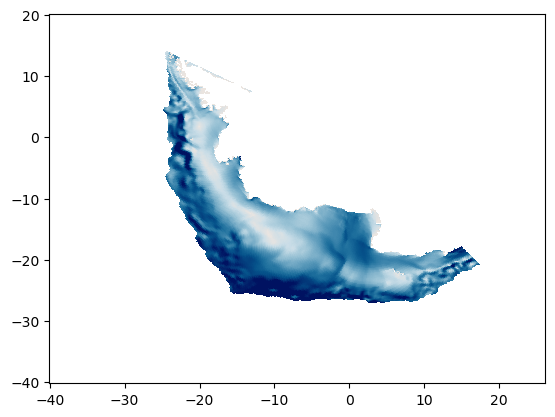

In [49]:
pcolormesh(x_cice, y_cice, speed_cice_cntr[tt,:,:], cmap=Vik_19_r_blues, norm=norm)
# pcolormesh(dim_cice.TLON, dim_cice.TLAT, speed_cice_cntr[tt,:,:], cmap=Vik_19_r_blues, norm=norm)

In [46]:
lat_roms

<xarray.DataArray 'lat_rho' (eta_rho: 329, xi_rho: 638)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ..., -50.03029636,
        -50.02708398, -50.02386639],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
    lon_rho  (eta_rho, xi_rho) float64 116.2 116.4 116.5 ... 299.4 299.6 299.9
    lat_rho  (eta_rho, xi_rho) float64 -79.49 -79.52 -79.55 ... -49.69 -49.69
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:      latitude of RHO-points
    units:          degree_north
    standard_name:  latitude
    field:          lat_rho, scalar

/jobfs/83257687.gadi-pbs/ipykernel_2810720/610636088.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  sc = pcolormesh(x_cice, y_cice, seaice_speed[0][tt,:,:], cmap=Vik_19_r_blues, norm=norm)
/jobfs/83257687.gadi-pbs/ipykernel_2810720/610636088.py:48: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  SC = pcolormesh(x_cice, y_cice, diff, cmap=Vik_19_r.mpl_colormap, vmin=-0.2, vmax=0.2)
/jobfs/83257687.gadi-pbs/ipykernel_2810720/610636088.py:68: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This m

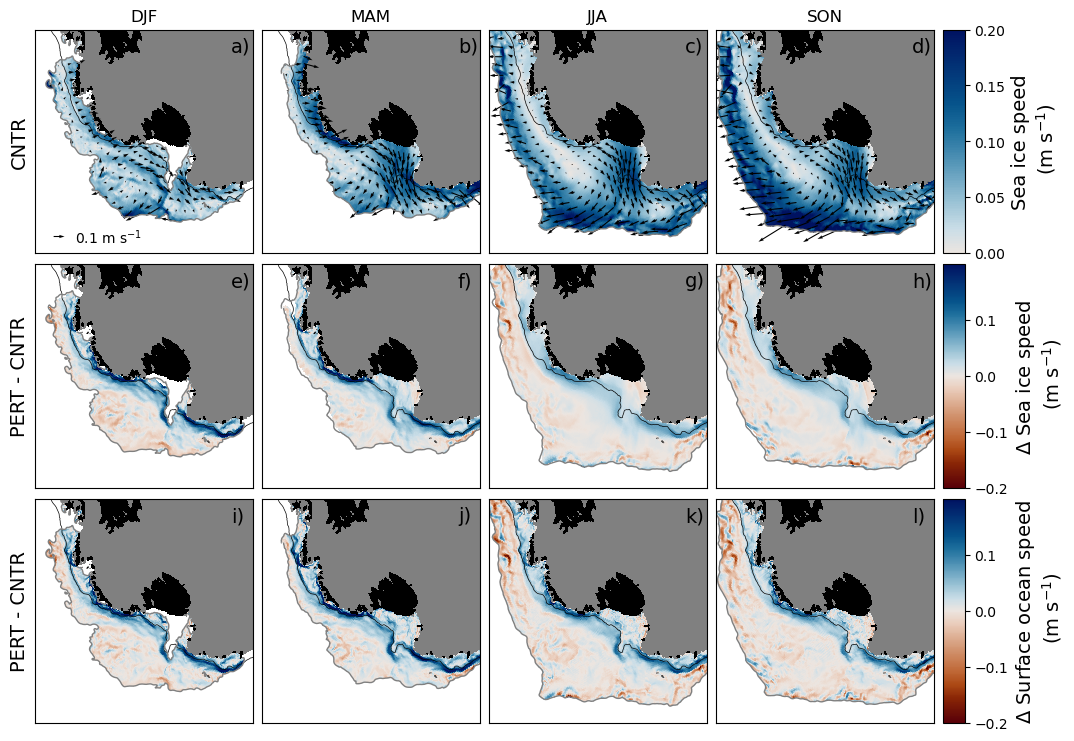

In [20]:
# Sea ice motion
fig = figure(figsize=(12,9))

gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.05)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[0], wspace=0.05)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[1], wspace=0.05)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[2], wspace=0.05)

for tt in range(len(season)):

    # CNTR
    ax = fig.add_subplot(gs0[0,tt])
    ax.text(0.9, 0.9, panel_name[tt], fontsize=ft_size, transform=ax.transAxes)
    title(season[tt])
    if tt == 0:
        ylabel('CNTR', fontsize=ft_size)
    setp(ax.get_yticklabels(), visible=False)
    setp(ax.get_xticklabels(), visible=False)
    ax.tick_params(axis='both', which='both', length=0)
    sc = pcolormesh(x_cice, y_cice, seaice_speed[0][tt,:,:], cmap=Vik_19_r_blues, norm=norm)
    #sc = pcolormesh(x_cice, y_cice, seaice_speed[0][tt,:,:], cmap=Vik_19_r.mpl_colormap, norm=norm)
    #sc = pcolormesh(x_cice, y_cice, seaice_speed[0][tt,:,:], cmap=cm.get_cmap('Purples'), vmin=0, vmax=0.2)
    contourf(x_reg, y_reg, land_circle_metroms, colors='0.5')
    contourf(x_roms, y_roms, lat_r, colors='0.5')
    contourf(x_roms, y_roms, zice*1, colors='k')
    contour(x_roms, y_roms, h, levels=[1000], colors='k', linewidths=0.5)
    contour(x_cice, y_cice, aice[0][tt,:,:], levels=[aice_extmin], colors='0.5', linewidths=1)
    Q = quiver(x_cice[::15,::15], y_cice[::15,::15], -uvel[0][tt,::15,::15], -vvel[0][tt,::15,::15], scale=2, width=0.005)
    if tt == 0:
        quiverkey(Q, 0.15, 0.65, 0.1, r'0.1 m s$^{-1}$', labelpos='E', coordinates='figure')
    xlim(xlim_min, xlim_max)
    ylim(ylim_min, ylim_max)

    # PERT-CNTR
    ax = fig.add_subplot(gs1[0,tt])
    ax.text(0.9, 0.9, panel_name[tt+4], fontsize=ft_size, transform=ax.transAxes)
    if tt == 0:
        ylabel('PERT - CNTR', fontsize=ft_size)
    setp(ax.get_xticklabels(), visible=False)
    setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis='both', which='both', length=0)
    diff = seaice_speed[1][tt,:,:]-seaice_speed[0][tt,:,:]
    #diff[thermod[1,tt,:,:] < -500] = -999
    #SC = pcolormesh(x_cice, y_cice, diff, cmap=PRGn_5_r.mpl_colormap, vmin=-0.2, vmax=0.2)
    SC = pcolormesh(x_cice, y_cice, diff, cmap=Vik_19_r.mpl_colormap, vmin=-0.2, vmax=0.2)
    contourf(x_reg, y_reg, land_circle_metroms, colors='0.5')
    contourf(x_roms, y_roms, lat_r, colors='0.5')
    contourf(x_roms, y_roms, zice*1, colors='k')
    contour(x_roms, y_roms, h, levels=[1000], colors='k', linewidths=0.5)
    contour(x_cice, y_cice, aice[0][tt,:,:], levels=[aice_extmin], colors='0.5', linewidths=1)
    xlim(xlim_min, xlim_max)
    ylim(ylim_min, ylim_max)

    # PERT-CNTR ocean surface speed
    ax = fig.add_subplot(gs2[0,tt])
    ax.text(0.9, 0.9, panel_long[tt], fontsize=ft_size, transform=ax.transAxes)
    if tt == 0:
        ylabel('PERT - CNTR', fontsize=ft_size)
    setp(ax.get_xticklabels(), visible=False)
    setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis='both', which='both', length=0)
    diff = speed[1][tt,:,:]-speed[0][tt,:,:]
    #diff[thermod[1,tt,:,:] < -500] = -999
    #SC_o = pcolormesh(x_roms, y_roms, diff, cmap=PRGn_5_r.mpl_colormap, vmin=-0.2, vmax=0.2)
    SC_o = pcolormesh(x_roms, y_roms, diff, cmap=Vik_19_r.mpl_colormap, vmin=-0.2, vmax=0.2)
    contourf(x_reg, y_reg, land_circle_metroms, colors='0.5')
    contourf(x_roms, y_roms, lat_r, colors='0.5')
    contourf(x_roms, y_roms, zice*1, colors='k')
    contour(x_roms, y_roms, h, levels=[1000], colors='k', linewidths=0.5)
    contour(x_cice, y_cice, aice[0][tt,:,:], levels=[aice_extmin], colors='0.5', linewidths=1)
    xlim(xlim_min, xlim_max)
    ylim(ylim_min, ylim_max)


# Add colorbars
cbar_ax0 = fig.add_subplot(gs0[:,-1])
cbar = colorbar(sc, cax=cbar_ax0, ticks=np.arange(0, 0.25, 0.05))
cbar.set_label('Sea ice speed\n (m s$^{-1}$)', fontsize=ft_size)
cbar_ax1 = fig.add_subplot(gs1[:,-1])
cbar = colorbar(SC, cax=cbar_ax1, ticks=np.arange(-0.2, 0.2, 0.1))
cbar.set_label('$\Delta$ Sea ice speed \n (m s$^{-1}$)', fontsize=ft_size)
cbar_ax2 = fig.add_subplot(gs2[:,-1])
cbar = colorbar(SC_o, cax=cbar_ax2, ticks=np.arange(-0.2, 0.2, 0.1))
cbar.set_label('$\Delta$ Surface ocean speed \n (m s$^{-1}$)', fontsize=ft_size)


# Finished
plot_flag = 0
if plot_flag == 0:
    fig.show()
elif plot_flag == 1:
    savefig(fig_name, dpi=my_dpi, bbox_inches='tight', facecolor='white')

------

---

Test with differently loaded sea ice data 

In [31]:
import xarray as xr

In [32]:
latmax = -50.
lonmin = 140#150.
lonmax = 300#300. 

Load sea ice velocities

In [57]:
cntr_1 = xr.open_dataset(cice_path[0])
cntr_1 = cntr_1.where((cntr_1.TLAT <= latmax) & (cntr_1.TLON >= lonmin) & (cntr_1.TLON <= lonmax), drop=True)

In [85]:
cntr_2 = xr.open_dataset('/g/data/gh9/wgh581/ROMS_Output/metroms_files/POST_PROCESS/uvel_vvel_CONTROL_2002_2011_full.nc')
cntr_2 = cntr_2.sel(time=slice('2008-12-01','2011-11-30')).groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))

In [33]:
test_1 = xr.open_dataset(cice_path[1])
test_1 = test_1.where((test_1.TLAT <= latmax) & (test_1.TLON >= lonmin) & (test_1.TLON <= lonmax), drop=True)

In [86]:
test_2 = xr.open_dataset('/g/data/gh9/wgh581/ROMS_Output/metroms_files/POST_PROCESS/uvel_vvel_4SSFLUX_2002_2011_full.nc')
test_2 = test_2.sel(time=slice('2008-12-01','2011-11-30')).groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))

In [102]:
test_3 = xr.open_dataset('/g/data/gh9/wgh581/ROMS_Output/metroms_files/POST_PROCESS/uvel_vvel_2SSFLUX_2002_2011_full.nc')
test_3 = test_3.sel(time=slice('2008-12-01','2011-11-30')).groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))

Rotate velocities

In [93]:
uvel_cntr_1, vvel_cntr_1 = rotate_vector_cice(cntr_1.uvel, cntr_1.vvel, cntr_1.ANGLE)
uvel_cntr_2, vvel_cntr_2 = rotate_vector_cice(cntr_2.uvel, cntr_2.vvel, cntr_1.ANGLE)

In [103]:
# Rotate to lat/lon grid
#angle_cice_area = angle_cice.where((angle_cice.TLAT <= latmax) & (angle_cice.TLON >= lonmin) & (angle_cice.TLON <= lonmax), drop=True)
uvel_1, vvel_1 = rotate_vector_cice(test_1.uvel, test_1.vvel, test_1.ANGLE)
uvel_2, vvel_2 = rotate_vector_cice(test_2.uvel, test_2.vvel, test_1.ANGLE)
uvel_3, vvel_3 = rotate_vector_cice(test_3.uvel, test_3.vvel, test_1.ANGLE)

Mask for sea ice area (skip now)

Speed

In [95]:
speed_cntr_1 = np.sqrt(uvel_cntr_1**2 + vvel_cntr_1**2)
speed_cntr_2 = np.sqrt(uvel_cntr_2**2 + vvel_cntr_2**2)

In [104]:
speed_1 = np.sqrt(uvel_1**2 + vvel_1**2)
speed_2 = np.sqrt(uvel_2**2 + vvel_2**2)
speed_3 = np.sqrt(uvel_3**2 + vvel_3**2)

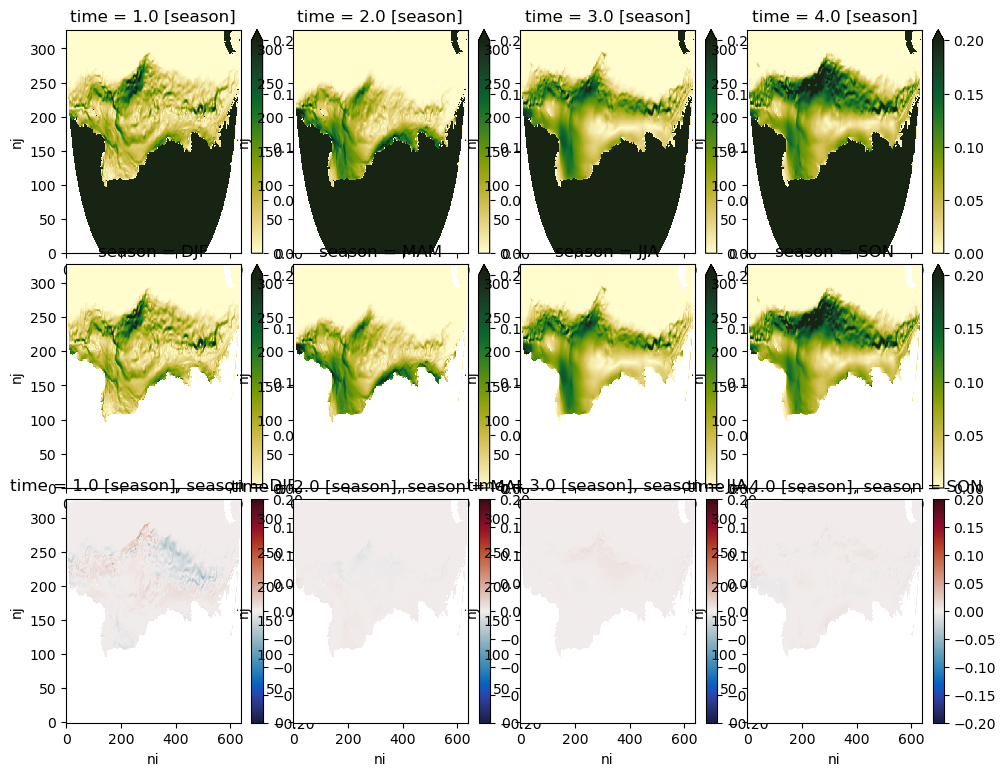

In [100]:
# Sea ice motion
fig = figure(figsize=(12,9))

gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.05)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[0], wspace=0.05)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[1], wspace=0.05)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[2], wspace=0.05)

for tt in range(len(season)):

    # CNTR
    ax = fig.add_subplot(gs0[0,tt])
    speed_cntr_1[tt,...].plot(vmin=0, vmax=0.2, cmap=cmo.speed)
    
    ax = fig.add_subplot(gs1[0,tt])
    speed_cntr_2[tt,...].plot(vmin=0, vmax=0.2, cmap=cmo.speed)
    
    ax = fig.add_subplot(gs2[0,tt])
    (speed_cntr_1[tt,...]-speed_cntr_2[tt,...]).plot(vmin=-0.2, vmax=0.2, cmap=cmo.balance)

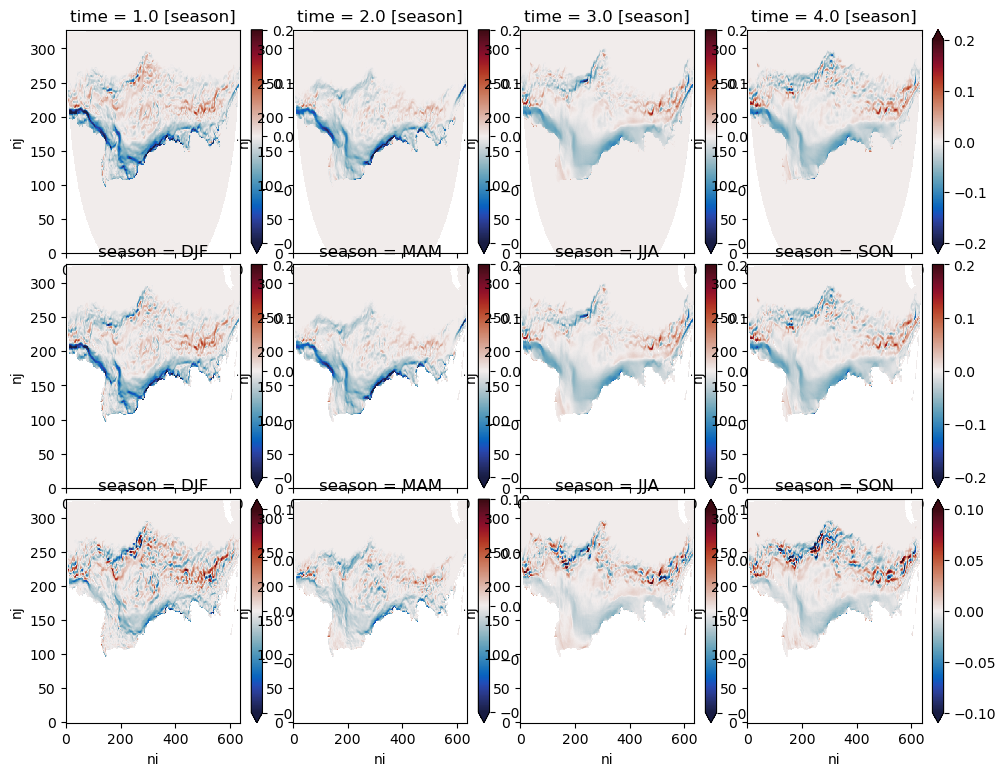

In [107]:
# Sea ice motion
fig = figure(figsize=(12,9))

gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.05)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[0], wspace=0.05)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[1], wspace=0.05)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[2], wspace=0.05)

for tt in range(len(season)):

    # CNTR
    ax = fig.add_subplot(gs0[0,tt])
    (speed_cntr_1[tt,...]-speed_1[tt,...]).plot(vmin=-0.2, vmax=0.2, cmap=cmo.balance)
    
    ax = fig.add_subplot(gs1[0,tt])
    (speed_cntr_2[tt,...]-speed_2[tt,...]).plot(vmin=-0.2, vmax=0.2, cmap=cmo.balance)
    
    ax = fig.add_subplot(gs2[0,tt])
    (speed_cntr_2[tt,...]-speed_3[tt,...]).plot(vmin=-0.1, vmax=0.1, cmap=cmo.balance)

/jobfs/83257687.gadi-pbs/ipykernel_2810720/347965275.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  SC_o = pcolormesh(x_roms, y_roms, diff, cmap=Vik_19_r.mpl_colormap, vmin=-0.1, vmax=0.1)


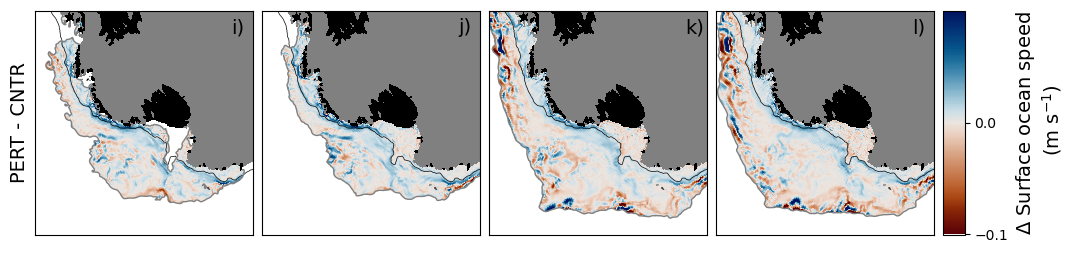

In [111]:
# Sea ice motion
fig = figure(figsize=(12,9))

gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.05)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[0], wspace=0.05)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[1], wspace=0.05)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 5, width_ratios=[1,1,1,1,0.1], \
        subplot_spec=gs[2], wspace=0.05)

for tt in range(len(season)):


    # PERT-CNTR ocean surface speed
    ax = fig.add_subplot(gs2[0,tt])
    ax.text(0.9, 0.9, panel_long[tt], fontsize=ft_size, transform=ax.transAxes)
    if tt == 0:
        ylabel('PERT - CNTR', fontsize=ft_size)
    setp(ax.get_xticklabels(), visible=False)
    setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis='both', which='both', length=0)
    diff = speed[1][tt,:,:]-speed[0][tt,:,:]
    #diff[thermod[1,tt,:,:] < -500] = -999
    #SC_o = pcolormesh(x_roms, y_roms, diff, cmap=PRGn_5_r.mpl_colormap, vmin=-0.2, vmax=0.2)
    SC_o = pcolormesh(x_roms, y_roms, diff, cmap=Vik_19_r.mpl_colormap, vmin=-0.1, vmax=0.1)
    contourf(x_reg, y_reg, land_circle_metroms, colors='0.5')
    contourf(x_roms, y_roms, lat_r, colors='0.5')
    contourf(x_roms, y_roms, zice*1, colors='k')
    contour(x_roms, y_roms, h, levels=[1000], colors='k', linewidths=0.5)
    contour(x_cice, y_cice, aice[0][tt,:,:], levels=[aice_extmin], colors='0.5', linewidths=1)
    xlim(xlim_min, xlim_max)
    ylim(ylim_min, ylim_max)


# Add colorbars
# cbar_ax0 = fig.add_subplot(gs0[:,-1])
# cbar = colorbar(sc, cax=cbar_ax0, ticks=np.arange(0, 0.25, 0.05))
# cbar.set_label('Sea ice speed\n (m s$^{-1}$)', fontsize=ft_size)
# cbar_ax1 = fig.add_subplot(gs1[:,-1])
# cbar = colorbar(SC, cax=cbar_ax1, ticks=np.arange(-0.2, 0.2, 0.1))
# cbar.set_label('$\Delta$ Sea ice speed \n (m s$^{-1}$)', fontsize=ft_size)
cbar_ax2 = fig.add_subplot(gs2[:,-1])
cbar = colorbar(SC_o, cax=cbar_ax2, ticks=np.arange(-0.1, 0.1, 0.1))
cbar.set_label('$\Delta$ Surface ocean speed \n (m s$^{-1}$)', fontsize=ft_size)


# Finished
plot_flag = 0
if plot_flag == 0:
    fig.show()
elif plot_flag == 1:
    savefig(fig_name, dpi=my_dpi, bbox_inches='tight', facecolor='white')